<a href="https://colab.research.google.com/github/RoshanTS/pfe-estia/blob/data_analysis/tweets_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import de librairies

In [0]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


from google.colab import drive

#Import de données

In [8]:

drive.mount('/content/gdrive/')

!ls /content/gdrive/Shared\ drives/PFE_ING3_ESTIA/data/cleaned_data/hongkong

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
'df_tweets_cleaned_en_24-10-2019__23:46:46 (1).csv'
 df_tweets_cleaned_en_24-10-2019__23:46:46.csv


In [0]:
data = pd.read_csv('/content/gdrive/Shared drives/PFE_ING3_ESTIA/data/cleaned_data/hongkong/df_tweets_cleaned_en_24-10-2019__23:46:46.csv')


In [20]:
data

,Unnamed: 0,user,tweet content,tweet_punct,tweet_tokenized,tweet_nonstop,tweet_stemmed,tweet_lemmatized
0,0,globaltimesnews,#HongKong police arrested 13 people aged betwe...,HongKong police arrested people aged between ...,"['hongkong', 'police', 'arrested', 'people', '...","['hongkong', 'police', 'arrested', 'people', '...","['hongkong', 'polic', 'arrest', 'peopl', 'age'...","['hongkong', 'police', 'arrested', 'people', '..."
1,1,PM_Thornton,BBC #HongKong: Hecklers dragged out in new par...,BBC HongKong Hecklers dragged out in new parli...,"['bbc', 'hongkong', 'hecklers', 'dragged', 'ou...","['bbc', 'hongkong', 'hecklers', 'dragged', 'ne...","['bbc', 'hongkong', 'heckler', 'drag', 'new', ...","['bbc', 'hongkong', 'heckler', 'dragged', 'new..."
2,2,globaltimesnews,#HongKong police have issued a notice of objec...,HongKong police have issued a notice of object...,"['hongkong', 'police', 'have', 'issued', 'a', ...","['hongkong', 'police', 'issued', 'notice', 'ob...","['hongkong', 'polic', 'issu', 'notic', 'object...","['hongkong', 'police', 'issued', 'notice', 'ob..."
3,3,HongKong,Temporary Relocation of GMB Stand on Sai Sha R...,Temporary Relocation of GMB Stand on Sai Sha R...,"['temporary', 'relocation', 'of', 'gmb', 'stan...","['temporary', 'relocation', 'gmb', 'stand', 's...","['temporari', 'reloc', 'gmb', 'stand', 'sai', ...","['temporary', 'relocation', 'gmb', 'stand', 's..."
4,4,HongKongFP,The Yuen Long District Council candidacy of ac...,The Yuen Long District Council candidacy of ac...,"['the', 'yuen', 'long', 'district', 'council',...","['yuen', 'long', 'district', 'council', 'candi...","['yuen', 'long', 'district', 'council', 'candi...","['yuen', 'long', 'district', 'council', 'candi..."
...,...,...,...,...,...,...,...,...
1995,1995,dilonkalel,Sometimes you gotta create what you want to be...,Sometimes you gotta create what you want to be...,"['sometimes', 'you', 'gotta', 'create', 'what'...","['sometimes', 'gotta', 'create', 'want', 'part...","['sometim', 'gotta', 'creat', 'want', 'part', ...","['sometimes', 'gotta', 'create', 'want', 'part..."
1996,1996,Hellowo77704373,@SolomonYue Thank you for your continuous atte...,ATUSER Thank you for your continuous attention...,"['atuser', 'thank', 'you', 'for', 'your', 'con...","['thank', 'continuous', 'attention', 'hongkong...","['thank', 'continu', 'attent', 'hongkong', 'st...","['thank', 'continuous', 'attention', 'hongkong..."
1997,1997,itshughesy,You used to be #TheKing @KingJames - I don't t...,You used to be TheKing ATUSER I dont think yo...,"['you', 'used', 'to', 'be', 'theking', 'atuser...","['used', 'theking', 'dont', 'think', 'really',...","['use', 'theke', 'dont', 'think', 'realli', 'u...","['used', 'theking', 'dont', 'think', 'really',..."
1998,1998,jameskim9898,@RudyDavid16 @JoshMcd38861645 @TSPARK12 @NBATV...,ATUSER ATUSER ATUSER ATUSER ATUSER Lmao you’re...,"['atuser', 'atuser', 'atuser', 'atuser', 'atus...","['lmao', 'acting', 'lebron', 'job', 'protect',...","['lmao', 'act', 'lebron', 'job', 'protect', 'h...","['lmao', 'acting', 'lebron', 'job', 'protect',..."


#Analyse des tweets

##Analyse de la répartition de provenance des tweets par pays

On importe un jeu de données ou le batch a été fait sur un dataset avec des tweets de toutes les langues :

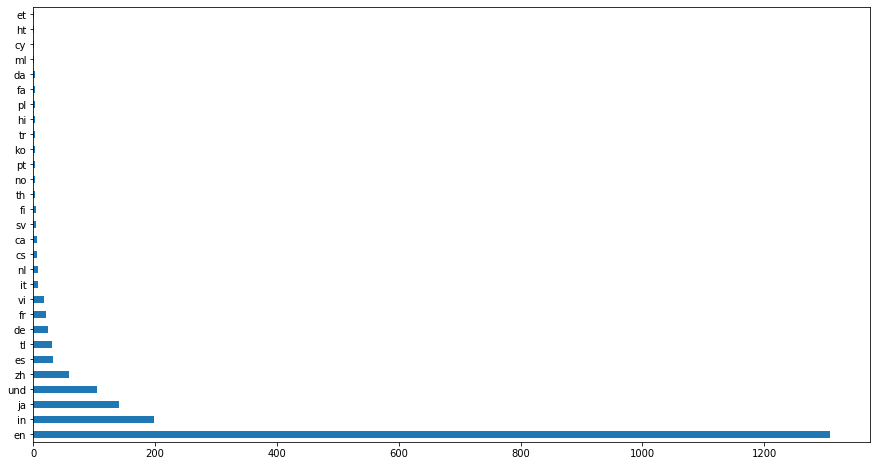

In [18]:
data_all_languages = pd.read_csv('/content/gdrive/Shared drives/PFE_ING3_ESTIA/data/raw_data/hongkong/df_tweets_18-10-2019__02:23:32.csv')

data_all_languages.language.value_counts().plot(kind = 'barh', figsize = (15,8))

## Wordcloud

Créons un wordcloud à partir de nos données.

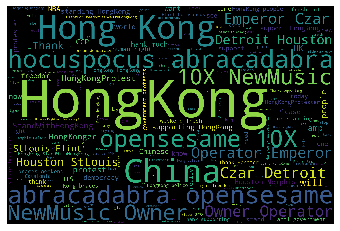

In [45]:


# join tweets to a single string
words = ' '.join(data['tweet content'])

# remove URLs, RTs, and twitter handles
no_urls_no_tags = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wordcloud = WordCloud(
                      stopwords=STOPWORDS,
                      background_color='black',
                      width=1920,
                      height=1280
                     ).generate(no_urls_no_tags)

plt.imshow(wordcloud)
plt.axis('off')
#plt.savefig('wordcloud', dpi=300)
plt.show()

##Analyse de sentiments (positivité vs négativité)